## **CLICKBAIT SPOILING BY SPOILER CLASSIFICATION**

### Srivatsav Venkatakrishnan
### Faculty of Engineering, Environment and Computing
### MSc. Data Science and Computational Intelligence

# Install Dependencies

In [1]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.7 MB/s eta 0:00:00


In [2]:
# Transformers installation
! pip install datasets evaluate
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00


# Connect GDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os

dataset_path = '/content/drive/MyDrive/MS_Sriva_NLP/Task1/Dataset/'
### check the list files in the folder
print(os.listdir(dataset_path))

['validation.jsonl', 'README.md', 'train.jsonl', 'runs', 'checkpoint-500', 'checkpoint-1000', 'checkpoint-1500', 'LSTM_classifier.h5']


# Load The Dataset

In [11]:
import pandas as pd
import json

id2label = {0: "phrase", 1: "passage",2:"multi"}


label2id = {"phrase": 0, "passage": 1,"multi":2}

def load_data_from_file(file_name):
    data_list = []

    with open(dataset_path + file_name) as file:
        for line in file:
            data = json.loads(line)

            # Extract data from JSON
            tweet = data['postText'][0]
            article_title = data['targetTitle']
            article = ' '.join(data['targetParagraphs'])
            label = data['tags'][0]

            # Ensure label is one of the specified categories
            valid_labels = ['phrase', 'phrases', 'passage', 'multi']

            if label not in valid_labels:
                print("Invalid label:", label)
                continue

            # Skip 'multi' labeled entries
            #if label == 'multi':
            #    continue

            # Combine text and labels
            text = tweet + ' - ' + article_title + article
            #is_clickbait = label in ['phrase', 'phrases','multi']

            data_list.append({'text': text,'category':label})

    return pd.DataFrame(data_list)


# Feature Engineering & Pre-Processing

In [12]:
# Load the train datasets
train_data = load_data_from_file('train.jsonl')

train_data.head(3)

,text,category
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage
1,NASA sets date for full recovery of ozone hole...,phrase
2,This is what makes employees happy -- and it's...,phrase


In [13]:
train_data['category'].value_counts()


phrase     1367
passage    1274
multi       559
Name: category, dtype: int64

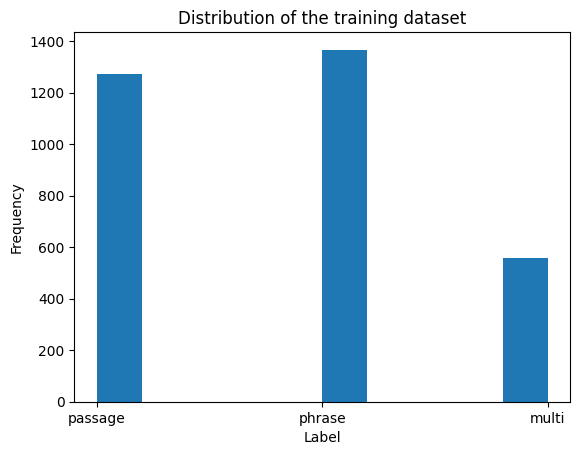

In [14]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
labels = train_data['category']
plt.hist(labels)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of the training dataset')
plt.show()


In [15]:
from wordcloud import WordCloud

# Assuming your DataFrame is named 'df'
text_data = train_data['text']

# Combine all text data into a single string
text_train = ' '.join(text_data)

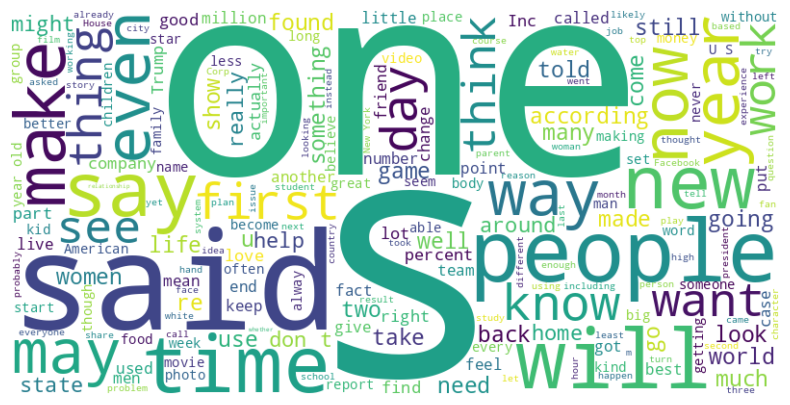

In [16]:
# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_train)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# Load the valid datasets

validation_data = load_data_from_file('validation.jsonl')
validation_data.head(3)

,text,category
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi
2,Here’s how much you should be tipping your hai...,phrase


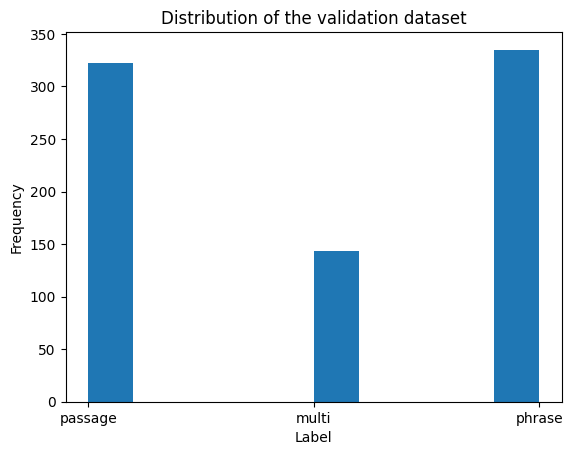

In [18]:
# Assuming your DataFrame is named 'df'
labels = validation_data['category']
plt.hist(labels)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of the validation dataset')
plt.show()

In [19]:
# Assuming your DataFrame is named 'df'
text_data = validation_data['text']

# Combine all text data into a single string
text_valid = ' '.join(text_data)

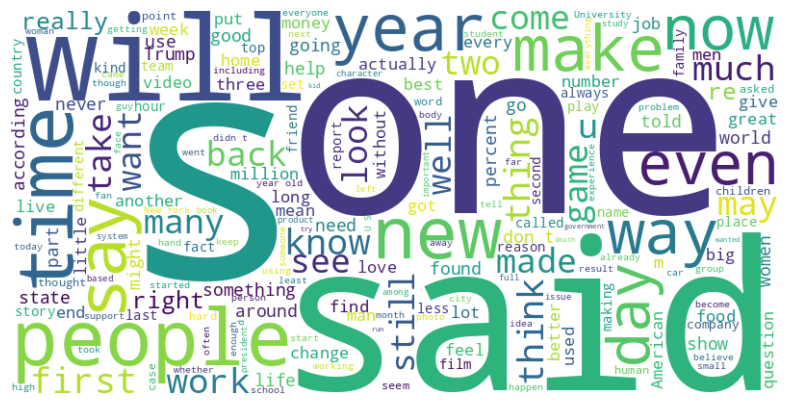

In [20]:
# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_valid)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
import nltk
import string
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
import string
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
# Import NLTK and download the stopwords dataset if not already downloaded


# Function to clean and preprocess text
class Cleaner():
  def __init__(self):
    pass
  def put_line_breaks(self,text):
    text = text.replace('</p>','</p>\n')
    return text
  def remove_html_tags(self,text):
    cleantext = BeautifulSoup(text, "lxml").text
    return cleantext
  def clean(self,text):
    text = self.put_line_breaks(text)
    text = self.remove_html_tags(text)
    return text

In [23]:
cleaner = Cleaner()
validation_data['text_cleaned'] = validation_data['text'].apply(cleaner.clean)
validation_data.head(3)

,text,category,text_cleaned
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage,Five Nights at Freddy’s Sequel Delayed for Wei...
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi,Why Arizona Sheriff Joe Arpaio’s fate could ha...
2,Here’s how much you should be tipping your hai...,phrase,Here’s how much you should be tipping your hai...


In [24]:
train_data['text_cleaned'] = train_data['text'].apply(cleaner.clean)
train_data.head(3)

,text,category,text_cleaned
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage,"Wes Welker Wanted Dinner With Tom Brady, But P..."
1,NASA sets date for full recovery of ozone hole...,phrase,NASA sets date for full recovery of ozone hole...
2,This is what makes employees happy -- and it's...,phrase,This is what makes employees happy -- and it's...


# Label Encoder

In [25]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit(train_data['category'].tolist())
train_data['label'] = le.transform(train_data['category'].tolist())

In [26]:
le = preprocessing.LabelEncoder()
le.fit(validation_data['category'].tolist())
validation_data['label'] = le.transform(validation_data['category'].tolist())

In [27]:
train_data.head(3)

,text,category,text_cleaned,label
0,"Wes Welker Wanted Dinner With Tom Brady, But P...",passage,"Wes Welker Wanted Dinner With Tom Brady, But P...",1
1,NASA sets date for full recovery of ozone hole...,phrase,NASA sets date for full recovery of ozone hole...,2
2,This is what makes employees happy -- and it's...,phrase,This is what makes employees happy -- and it's...,2


In [28]:
validation_data.head(3)

,text,category,text_cleaned,label
0,Five Nights at Freddy’s Sequel Delayed for Wei...,passage,Five Nights at Freddy’s Sequel Delayed for Wei...,1
1,Why Arizona Sheriff Joe Arpaio’s fate could ha...,multi,Why Arizona Sheriff Joe Arpaio’s fate could ha...,0
2,Here’s how much you should be tipping your hai...,phrase,Here’s how much you should be tipping your hai...,2


# Tokenizer




In [29]:
from transformers import AutoTokenizer
from datasets import Dataset

In [30]:

model_name = "roberta-base" #"bert-large-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True,padding=True)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [31]:
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(validation_data)

In [32]:
tokenized_train = train_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

In [33]:
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

# Initialize Model

In [34]:
from transformers import AutoModelForSequenceClassification

In [35]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np

In [37]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [38]:
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [39]:
!pip install accelerate -U

# Training

In [51]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/MS_Sriva_2023/NLP_Task1/",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy = "epoch",
    logging_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics

)


In [52]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.069700,1.093875,0.418750
2,1.056700,1.064970,0.418750
3,1.048400,1.045743,0.402500
4,1.042800,1.039742,0.418750
5,1.037300,1.041533,0.418750


TrainOutput(global_step=4000, training_loss=1.050957015991211, metrics={'train_runtime': 2014.3478, 'train_samples_per_second': 7.943, 'train_steps_per_second': 1.986, 'total_flos': 4209814683648000.0, 'train_loss': 1.050957015991211, 'epoch': 5.0})

# Experimentation

In [53]:
model_name1 = "bert-large-cased"
tokenizer1 = AutoTokenizer.from_pretrained(model_name1)

def preprocess_function1(examples):
    return tokenizer1(examples["text"], truncation=True,padding=True)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [54]:
tokenized_train1 = train_dataset.map(preprocess_function1, batched=True)

tokenized_test1 = test_dataset.map(preprocess_function1, batched=True)

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

In [55]:
model1 = AutoModelForSequenceClassification.from_pretrained(model_name1, num_labels=3)

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
data_collator1 = DataCollatorWithPadding(tokenizer=tokenizer1)


model_name_save = model_name1.split("/")[-1]

training_args = TrainingArguments(
    output_dir=f"/content/drive/MyDrive/MS_Sriva_2023/NLP_Task1/{model_name_save}",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_strategy="epoch"
)

trainer1 = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train1,
    eval_dataset=tokenized_test1,
    tokenizer=tokenizer1,
    data_collator=data_collator1,
    compute_metrics=compute_metrics

)



In [57]:
trainer1.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,1.049200,1.081234,0.418750
2,1.041700,1.067849,0.418750
3,1.041600,1.045992,0.402500
4,1.038400,1.040109,0.418750
5,1.036800,1.041650,0.418750


TrainOutput(global_step=4000, training_loss=1.041528549194336, metrics={'train_runtime': 2022.0026, 'train_samples_per_second': 7.913, 'train_steps_per_second': 1.978, 'total_flos': 4209814683648000.0, 'train_loss': 1.041528549194336, 'epoch': 5.0})

In [58]:
model_name2 = "microsoft/deberta-base"
tokenizer2 = AutoTokenizer.from_pretrained(model_name2)

def preprocess_function2(examples):
    return tokenizer2(examples["text"], truncation=True,padding=True)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [59]:
tokenized_train2 = train_dataset.map(preprocess_function2, batched=True)

tokenized_test2 = test_dataset.map(preprocess_function2, batched=True)

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

In [60]:
model2 = AutoModelForSequenceClassification.from_pretrained(model_name2, num_labels=3)

pytorch_model.bin:   0%|          | 0.00/559M [00:00<?, ?B/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.weight', 'classifier.weight', 'pooler.dense.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
data_collator2 = DataCollatorWithPadding(tokenizer=tokenizer2)


model_name_save = model_name2.split("/")[-1]

training_args2 = TrainingArguments(
    output_dir=f"/content/drive/MyDrive/MS_Sriva_2023/NLP_Task1/{model_name_save}",
    learning_rate=2e-4,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_strategy="epoch"
)

trainer2 = Trainer(
    model=model2,
    args=training_args2,
    train_dataset=tokenized_train2,
    eval_dataset=tokenized_test2,
    tokenizer=tokenizer2,
    data_collator=data_collator2,
    compute_metrics=compute_metrics

)



In [67]:
trainer2.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.066300,1.043546,0.418750
2,1.048400,1.041518,0.418750
3,1.040800,1.045663,0.418750
4,1.039100,1.039456,0.418750
5,1.038600,1.040281,0.418750


TrainOutput(global_step=4000, training_loss=1.0466504974365234, metrics={'train_runtime': 3198.5576, 'train_samples_per_second': 5.002, 'train_steps_per_second': 1.251, 'total_flos': 4905599385600000.0, 'train_loss': 1.0466504974365234, 'epoch': 5.0})

In [68]:
trainer.save_model('"/content/drive/MyDrive/MS_Sriva_2023/CLICKBAIT/')

# Model Evaluation

In [69]:
from sklearn.metrics import classification_report

In [70]:
preds = trainer.predict(tokenized_test)
preds = np.argmax(preds[:3][0],axis=1) #preds[:3][1]
GT = validation_data['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00       322
           2       0.42      1.00      0.59       335

    accuracy                           0.42       800
   macro avg       0.14      0.33      0.20       800
weighted avg       0.18      0.42      0.25       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
preds = trainer1.predict(tokenized_test1)
preds = np.argmax(preds[:3][0],axis=1) #preds[:3][1]
GT = validation_data['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00       322
           2       0.42      1.00      0.59       335

    accuracy                           0.42       800
   macro avg       0.14      0.33      0.20       800
weighted avg       0.18      0.42      0.25       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
preds = trainer2.predict(tokenized_test2)
preds = np.argmax(preds[:3][0],axis=1) #preds[:3][1]
GT = validation_data['label'].tolist()
print(classification_report(GT,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00       322
           2       0.42      1.00      0.59       335

    accuracy                           0.42       800
   macro avg       0.14      0.33      0.20       800
weighted avg       0.18      0.42      0.25       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import runtime
runtime.unassign()

Reference :

1. https://simpletransformers.ai/docs/multi-class-classification/
2. https://github.com/webis-de/acl22-clickbait-spoiling/blob/main/spoiler-type-classification/classification-bert.ipynb
3. https://chat.openai.com/
